In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

# Replace 'your_dataset.csv' with the actual dataset file name
data = pd.read_csv('C:/Users/DELL/Desktop/SEM6/Machine Learning/project1/Copy of bank.csv')
print("Dataset Preview:")
print(data.head())
print("\nBasic Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Preview:
      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  29-Jun-17  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074'  05-Jul-17  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074'  18-Jul-17        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074'  01-Aug-17   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074'  16-Aug-17        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT   DEPOSIT AMT    BALANCE AMT  
0  29-Jun-17              NaN  1,000,000.00  1,000,000.00  
1  05-Jul-17              NaN  1,000,000.00  2,000,000.00  
2  18-Jul-17              NaN    500,000.00  2,500,000.00  
3  01-Aug-17              NaN  3,000,000.00  5,500,000.00  
4  16-Aug-17              NaN    500,000.00  6,000,000.00  

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
--- 

In [12]:
# Handle Missing Values Based on Your Requirements
# Replace missing values in 'CHQ.NO.' with 0
data['CHQ.NO.'].fillna(0, inplace=True)

# Replace missing values in 'Withdrawl Amount' and 'Deposit Amount' with 0
data[' WITHDRAWAL AMT '].fillna(0, inplace=True)
data[' DEPOSIT AMT '].fillna(0, inplace=True)

# Remove rows where 'Transaction Details' are missing
data.dropna(subset=['TRANSACTION DETAILS'], inplace=True)

# Confirm the changes
print("Dataset after handling missing values:")
print(data.isnull().sum())


Dataset after handling missing values:
Account No             0
DATE                   0
TRANSACTION DETAILS    0
CHQ.NO.                0
VALUE DATE             0
 WITHDRAWAL AMT        0
 DEPOSIT AMT           0
BALANCE AMT            0
dtype: int64


In [14]:
# Select numerical columns from the dataset
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to each numerical column
for col in num_cols:
    data = remove_outliers_iqr(data, col)

print("\nDataset after removing outliers:")
print(data.head())



Dataset after removing outliers:
      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  29-Jun-17  TRF FROM  Indiaforensic SERVICES      0.0   
1  409000611074'  05-Jul-17  TRF FROM  Indiaforensic SERVICES      0.0   
2  409000611074'  18-Jul-17        FDRL/INTERNAL FUND TRANSFE      0.0   
3  409000611074'  01-Aug-17   TRF FRM  Indiaforensic SERVICES      0.0   
4  409000611074'  16-Aug-17        FDRL/INTERNAL FUND TRANSFE      0.0   

  VALUE DATE  WITHDRAWAL AMT   DEPOSIT AMT    BALANCE AMT  
0  29-Jun-17                0  1,000,000.00  1,000,000.00  
1  05-Jul-17                0  1,000,000.00  2,000,000.00  
2  18-Jul-17                0    500,000.00  2,500,000.00  
3  01-Aug-17                0  3,000,000.00  5,500,000.00  
4  16-Aug-17                0    500,000.00  6,000,000.00  


In [16]:
from sklearn.preprocessing import StandardScaler

# Ensure 'data' is a proper copy of the dataset
data = data.copy()

# Normalize/scale numerical columns
scaler = StandardScaler()
data.loc[:, num_cols] = scaler.fit_transform(data[num_cols])

print("\nNormalized Data Preview:")
print(data.head())



Normalized Data Preview:
      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074'  29-Jun-17  TRF FROM  Indiaforensic SERVICES      0.0   
1  409000611074'  05-Jul-17  TRF FROM  Indiaforensic SERVICES      0.0   
2  409000611074'  18-Jul-17        FDRL/INTERNAL FUND TRANSFE      0.0   
3  409000611074'  01-Aug-17   TRF FRM  Indiaforensic SERVICES      0.0   
4  409000611074'  16-Aug-17        FDRL/INTERNAL FUND TRANSFE      0.0   

  VALUE DATE  WITHDRAWAL AMT   DEPOSIT AMT    BALANCE AMT  
0  29-Jun-17                0  1,000,000.00  1,000,000.00  
1  05-Jul-17                0  1,000,000.00  2,000,000.00  
2  18-Jul-17                0    500,000.00  2,500,000.00  
3  01-Aug-17                0  3,000,000.00  5,500,000.00  
4  16-Aug-17                0    500,000.00  6,000,000.00  


In [20]:
data = data.replace("'", "", regex=True)


In [24]:
print(data.dtypes)  # Check the data types of all columns


Account No              object
DATE                    object
TRANSACTION DETAILS     object
CHQ.NO.                float64
VALUE DATE              object
 WITHDRAWAL AMT         object
 DEPOSIT AMT            object
BALANCE AMT             object
dtype: object


In [40]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(processed_data)
    score = silhouette_score(processed_data, labels)
    print(f'k={k}, Silhouette Score={score}')


k=2, Silhouette Score=0.8771283998559003
k=3, Silhouette Score=0.7643188940318173
k=4, Silhouette Score=0.7774285949219898
k=5, Silhouette Score=0.8135397935154348
k=6, Silhouette Score=0.7940309480255893
k=7, Silhouette Score=0.7905592980164777
k=8, Silhouette Score=0.7631706073041968
k=9, Silhouette Score=0.7348246050185517
k=10, Silhouette Score=0.7491324056905796


K-Means Silhouette Score: 0.8771283998559003


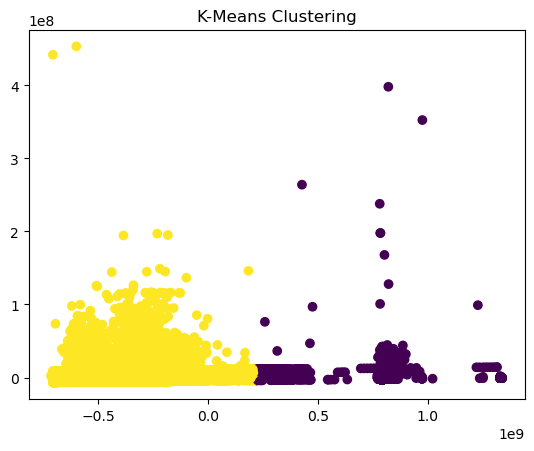

             DATE  CHQ.NO.  VALUE DATE   WITHDRAWAL AMT   DEPOSIT AMT   \
Cluster                                                                  
0        719163.0      0.0    719163.0      1.714539e+06           0.0   
1        719163.0      0.0    719163.0      5.815377e+06           0.0   

          BALANCE AMT  
Cluster                
0       -5.072886e+08  
1       -1.718214e+09  


In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Clean and preprocess data dynamically
def preprocess_data(data):
    # Convert 'DATE' and 'VALUE DATE' to numeric ordinal values
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    data['VALUE DATE'] = pd.to_datetime(data['VALUE DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    
    # Ensure only string-type columns use .str.replace
    for col in ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']:
        if col in data.columns:
            # Check if column is of object type (string-like)
            if data[col].dtype == 'object':
                data[col] = data[col].str.replace(",", "", regex=True).astype(float)

    # Drop non-numeric columns that aren't useful for clustering
    data = data.drop(columns=['Account No', 'TRANSACTION DETAILS'], errors='ignore')
    
    # Drop rows with NaN values that arise during conversion
    data = data.dropna()
    
    return data

# Preprocess the dataset
processed_data = preprocess_data(data)

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init= 'auto')  # Explicitly setting n_init
labels_kmeans = kmeans.fit_predict(processed_data)

# Evaluate Silhouette Score
silhouette_kmeans = silhouette_score(processed_data, labels_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# Visualize Clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()
processed_data['Cluster'] = labels_kmeans
print(processed_data.groupby('Cluster').mean())

#The purple cluster (Cluster 0) corresponds to transactions with lower withdrawal amounts and less extreme balances, likely representing "normal" behavior.

#The yellow cluster (Cluster 1) indicates transactions with higher withdrawal amounts and more negative balances, potentially flagging unusual activity.


In [159]:
#cluster profiling wrt K Means
processed_data['Cluster'] = labels_kmeans


cluster_profile = processed_data.groupby('Cluster')[[' WITHDRAWAL AMT ', 'BALANCE AMT']].describe()
print(cluster_profile)


         WITHDRAWAL AMT                                               \
                   count          mean           std   min       25%   
Cluster                                                                
0                16878.0  1.714539e+06  7.532125e+06  0.01   1000.00   
1                35766.0  5.815377e+06  1.196522e+07  0.25  13640.75   

                                               BALANCE AMT                \
               50%           75%           max       count          mean   
Cluster                                                                    
0          4000.00  1.151401e+05  4.000000e+08     16878.0 -5.072886e+08   
1        362163.83  1.000000e+07  4.594475e+08     35766.0 -1.718214e+09   

                                                                               \
                  std           min           25%           50%           75%   
Cluster                                                                         
0        1.7439

In [122]:
#anamoly detection 
# Clean column names to remove leading/trailing spaces
processed_data.columns = processed_data.columns.str.strip()

# Define the threshold value
withdrawal_threshold = 700000     

unusual_withdrawals = processed_data[
    (processed_data['Cluster'] == 0) & 
    (processed_data['WITHDRAWAL AMT'] > withdrawal_threshold)
]

# Print the unusual transactions
print("Unusual Withdrawals:")
print(unusual_withdrawals)

Unusual Withdrawals:
         DATE  CHQ.NO.  VALUE DATE  WITHDRAWAL AMT DEPOSIT AMT   BALANCE AMT  \
278    719163      0.0      719163        710800.0           0  6.082190e+05   
409    719163      0.0      719163        823240.0           0  5.415560e+05   
412    719163      0.0      719163        785049.0           0  7.565070e+05   
454    719163      0.0      719163        793251.0           0  9.696760e+05   
456    719163      0.0      719163        717850.0           0  7.518260e+05   
...       ...      ...         ...             ...         ...           ...   
28706  719163      0.0      719163       5000000.0           0 -1.077397e+09   
28707  719163      0.0      719163      12000000.0           0 -1.089397e+09   
28708  719163      0.0      719163      12000000.0           0 -1.101397e+09   
28741  719163      0.0      719163      15000000.0           0 -1.096396e+09   
28742  719163      0.0      719163      15000000.0           0 -1.111396e+09   

       Cluster  
2

In [128]:
#Time-Based Analysis
processed_data['Hour'] = pd.to_datetime(processed_data['DATE'], errors='coerce').dt.hour
processed_data['Day'] = pd.to_datetime(processed_data['DATE'], errors='coerce').dt.dayofweek

print(processed_data[['DATE', 'Hour', 'Day']].head())

      DATE  Hour  Day
10  719163     0    3
11  719163     0    3
12  719163     0    3
13  719163     0    3
14  719163     0    3


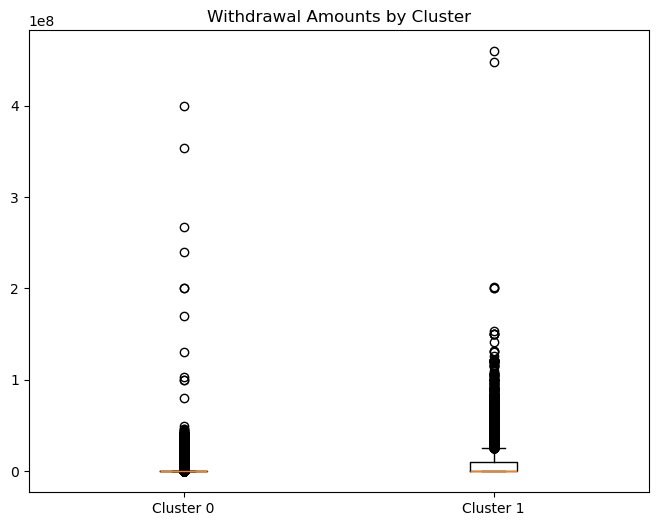

In [130]:
#visualization
plt.figure(figsize=(8, 6))
plt.boxplot([processed_data[processed_data['Cluster'] == i]['WITHDRAWAL AMT'] for i in processed_data['Cluster'].unique()],
            labels=[f"Cluster {i}" for i in processed_data['Cluster'].unique()])
plt.title('Withdrawal Amounts by Cluster')
plt.show()


In [ ]:
dbscan

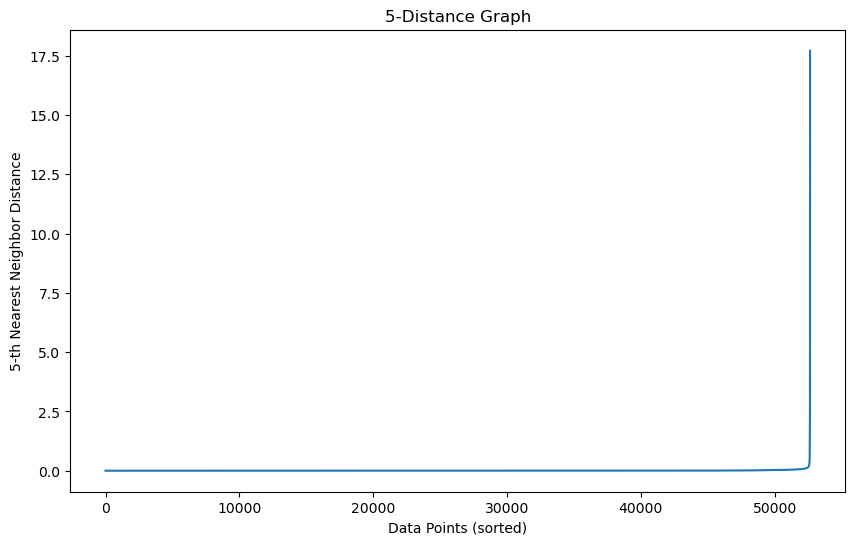

Testing eps=0.3, min_samples=3
DBSCAN Silhouette Score (eps=0.3, min_samples=3): 0.28738187551434397


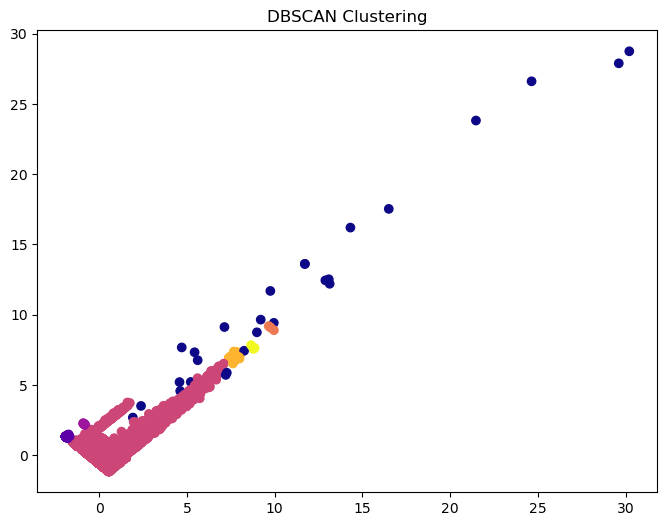

Testing eps=0.3, min_samples=5
DBSCAN Silhouette Score (eps=0.3, min_samples=5): 0.2874008876125269


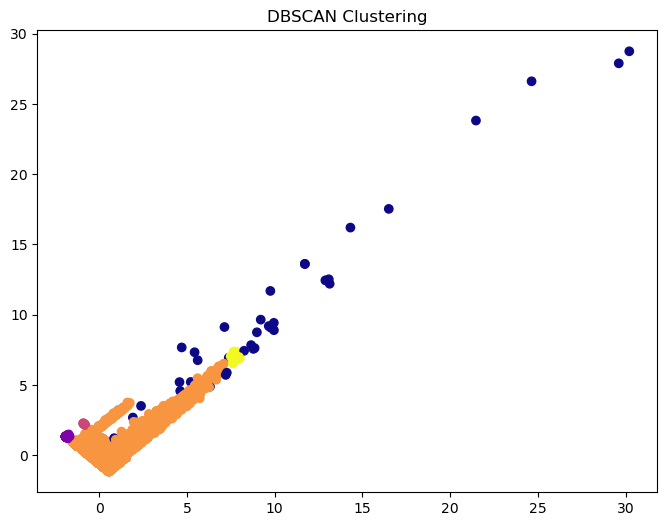

Testing eps=0.3, min_samples=7
DBSCAN Silhouette Score (eps=0.3, min_samples=7): 0.28745354000989576


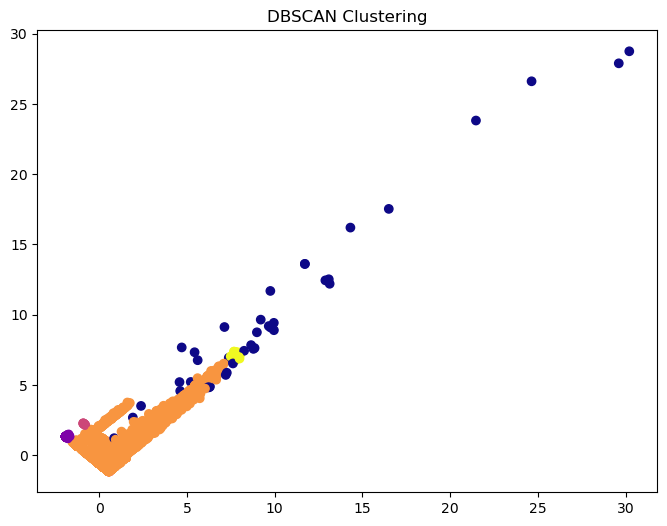

Testing eps=0.5, min_samples=3
DBSCAN Silhouette Score (eps=0.5, min_samples=3): 0.8549775463328225


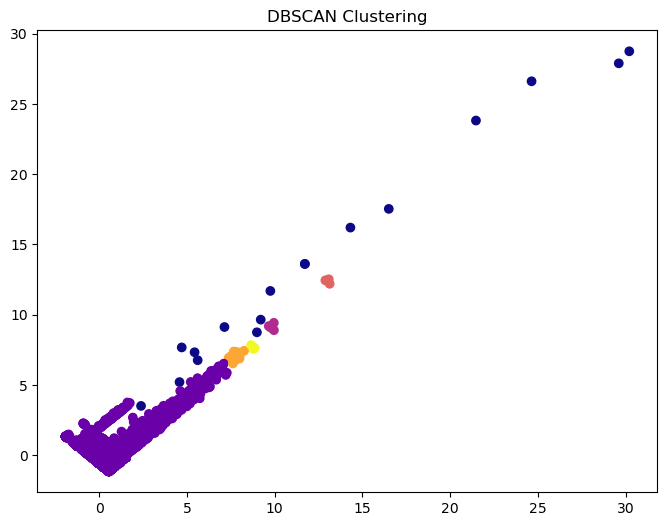

Testing eps=0.5, min_samples=5
DBSCAN Silhouette Score (eps=0.5, min_samples=5): 0.8549540111488982


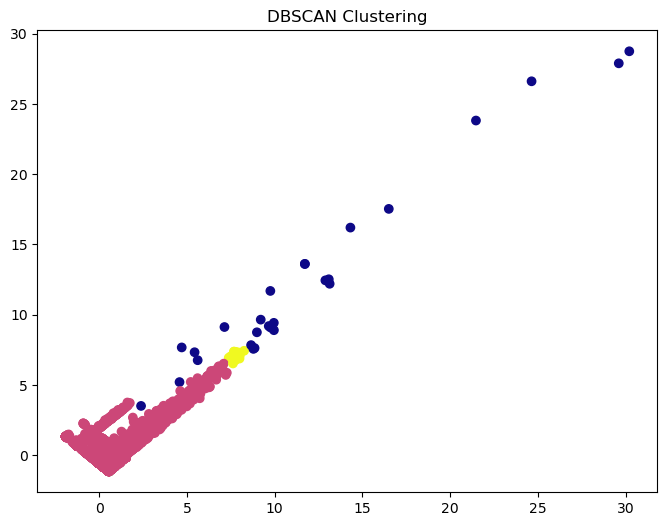

Testing eps=0.5, min_samples=7
DBSCAN Silhouette Score (eps=0.5, min_samples=7): 0.8549540111488982


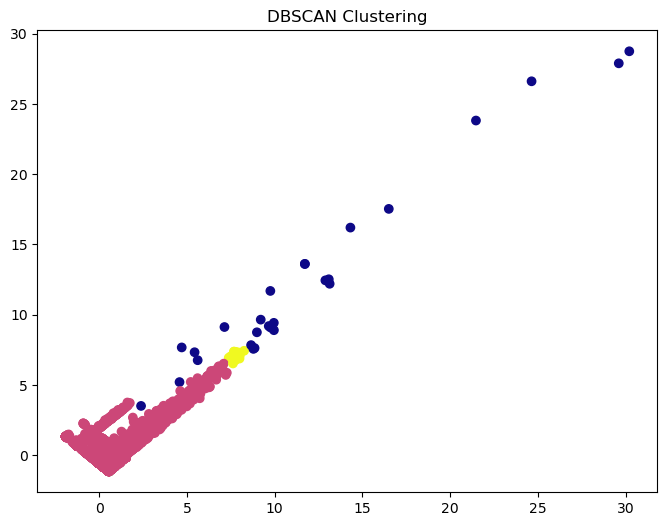

Testing eps=0.7, min_samples=3
DBSCAN Silhouette Score (eps=0.7, min_samples=3): 0.8857040721734262


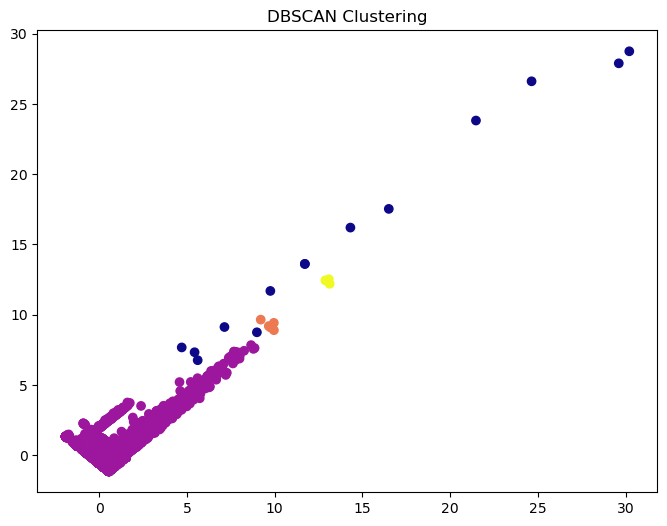

Testing eps=0.7, min_samples=5
DBSCAN Silhouette Score (eps=0.7, min_samples=5): 0.8856799950501112


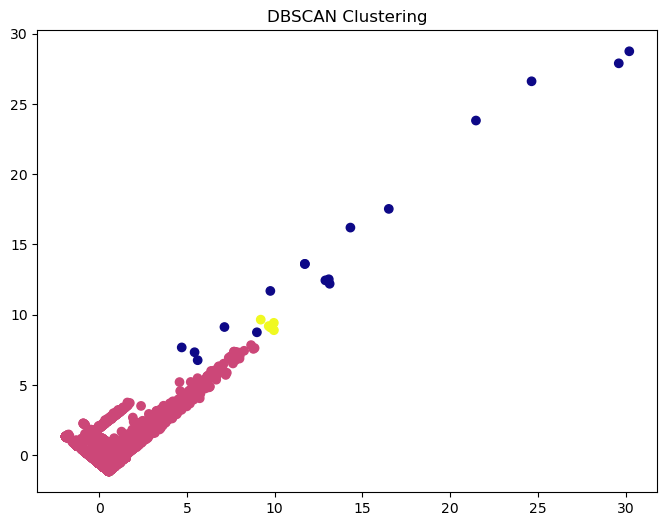

Testing eps=0.7, min_samples=7
DBSCAN Silhouette Score (eps=0.7, min_samples=7): 0.9207934695121256


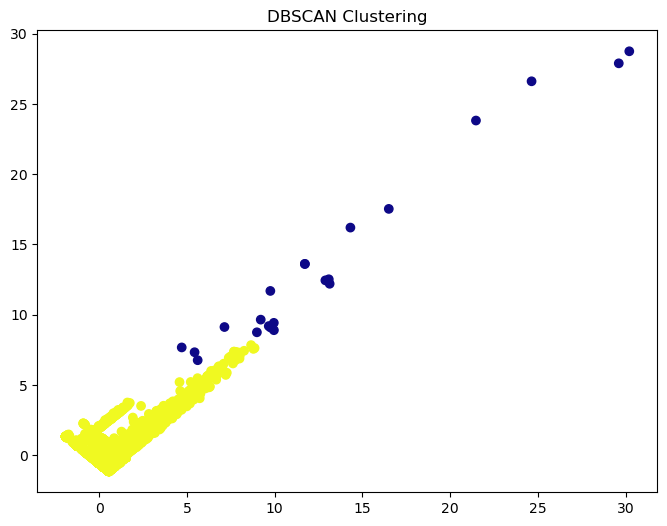

In [132]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Preprocess Data
def preprocess_data(data):
    # Drop non-numeric columns
    data = data.drop(columns=['Account No', 'TRANSACTION DETAILS'], errors='ignore')

    # Convert date columns to numeric ordinal values
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    data['VALUE DATE'] = pd.to_datetime(data['VALUE DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    
    # Remove commas and convert string columns to numeric
    for col in ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']:
        if col in data.columns and data[col].dtype == 'object':
            data[col] = data[col].str.replace(",", "", regex=True).astype(float)

    # Drop rows with missing values
    data = data.dropna()
    
    return data

# Step 2: Plot k-Distance Graph to find optimal eps
def plot_k_distance(data, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, _ = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, k - 1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f"{k}-Distance Graph")
    plt.xlabel("Data Points (sorted)")
    plt.ylabel(f"{k}-th Nearest Neighbor Distance")
    plt.show()

# Step 3: Perform DBSCAN with different parameters
def perform_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    unique_labels = set(labels)
    
    # Handle Silhouette Score if valid clusters exist
    if len(unique_labels) > 1 and -1 in unique_labels:
        silhouette = silhouette_score(data, labels)
        print(f"DBSCAN Silhouette Score (eps={eps}, min_samples={min_samples}): {silhouette}")
    elif len(unique_labels) > 1:
        silhouette = silhouette_score(data, labels)
        print(f"DBSCAN Silhouette Score (eps={eps}, min_samples={min_samples}): {silhouette}")
    else:
        print(f"Only one cluster or all points classified as noise with eps={eps} and min_samples={min_samples}.")
    
    return labels

# Step 4: Visualize DBSCAN Clusters
def visualize_clusters(data, labels):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='plasma')
    plt.title('DBSCAN Clustering')
    plt.show()

# Load and preprocess your dataset
# Replace 'your_dataset.csv' with your file or dataset
# data = pd.read_csv("your_dataset.csv")
processed_data = preprocess_data(data)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(processed_data)

# Plot k-distance graph
plot_k_distance(normalized_data, k=5)

# Choose eps and min_samples based on k-distance graph and experiment
eps_values = [0.3, 0.5, 0.7]  # Replace with values from your k-distance graph
min_samples_values = [3, 5, 7]  # Test various values for min_samples

# Iterate through parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Testing eps={eps}, min_samples={min_samples}")
        labels = perform_dbscan(normalized_data, eps, min_samples)
        visualize_clusters(normalized_data, labels)


In [134]:
# Append cluster labels to the original data
processed_data['Cluster'] = labels_dbscan

# Group by clusters and calculate statistics
cluster_summary = processed_data.groupby('Cluster').agg({
    ' WITHDRAWAL AMT ': ['mean', 'median', 'min', 'max'],
    'DATE': ['mean', 'min', 'max'],
})
print(cluster_summary)


         WITHDRAWAL AMT                                     DATE          \
                    mean    median   min           max      mean     min   
Cluster                                                                    
-1          4.500622e+06  46719.75  0.01  4.594475e+08  719163.0  719163   

                 
            max  
Cluster          
-1       719163  


In [138]:
# Filter noise points
noise_points = processed_data[processed_data['Cluster'] == -1]
print(f"Number of Noise Points: {len(noise_points)}")
print(noise_points[[' WITHDRAWAL AMT ', 'DATE']])


Number of Noise Points: 52644
         WITHDRAWAL AMT     DATE
10             133900.00  719163
11              18000.00  719163
12               5000.00  719163
13             195800.00  719163
14              81600.00  719163
...                  ...     ...
116194        1095668.87  719163
116195        1218673.00  719163
116196         117934.30  719163
116199         109868.65  719163
116200           5000.00  719163

[52644 rows x 2 columns]


In [144]:
# Example: Iterating over parameter combinations
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values: 
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(normalized_data)
        print(f"Parameters: eps={eps}, min_samples={min_samples}, Unique Clusters: {len(set(labels))}")


Parameters: eps=0.3, min_samples=3, Unique Clusters: 7
Parameters: eps=0.3, min_samples=5, Unique Clusters: 5
Parameters: eps=0.3, min_samples=7, Unique Clusters: 5
Parameters: eps=0.5, min_samples=3, Unique Clusters: 6
Parameters: eps=0.5, min_samples=5, Unique Clusters: 3
Parameters: eps=0.5, min_samples=7, Unique Clusters: 3


MemoryError: bad allocation

In [155]:
from sklearn.cluster import DBSCAN

# Define DBSCAN parameters
eps = 0.5  # Maximum distance between samples for them to be considered as in the same neighborhood
min_samples = 5  # Minimum number of points to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(processed_data)

# Add cluster labels to the processed data
processed_data['Cluster_DBSCAN'] = labels_dbscan

# Iterate over each cluster and summarize its statistics
cluster_ids = set(labels_dbscan)  # DBSCAN may have noise points labeled as -1
for cluster_id in cluster_ids:
    cluster_data = processed_data[processed_data['Cluster_DBSCAN'] == cluster_id]
    if cluster_id == -1:
        print("DBSCAN Noise Points:")
    else:
        print(f"DBSCAN Cluster {cluster_id}:")
    print(cluster_data.describe())  # Summarize key statistics for this cluster


DBSCAN Noise Points:
           DATE  CHQ.NO.  VALUE DATE   WITHDRAWAL AMT    BALANCE AMT  \
count   52644.0  52644.0     52644.0      5.264400e+04  5.264400e+04   
mean   719163.0      0.0    719163.0      4.500622e+06 -1.329984e+09   
std         0.0      0.0         0.0      1.091406e+07  5.857934e+08   
min    719163.0      0.0    719163.0      1.000000e-02 -2.045201e+09   
25%    719163.0      0.0    719163.0      3.000000e+03 -1.690392e+09   
50%    719163.0      0.0    719163.0      4.671975e+04 -1.660955e+09   
75%    719163.0      0.0    719163.0      5.000000e+06 -5.458362e+08   
max    719163.0      0.0    719163.0      4.594475e+08  8.366100e+06   

            Cluster  Cluster_DBSCAN  
count  52644.000000         52644.0  
mean       0.746201            -1.0  
std        0.491092             0.0  
min        0.000000            -1.0  
25%        0.000000            -1.0  
50%        1.000000            -1.0  
75%        1.000000            -1.0  
max        2.000000       

In [ ]:
GMM

GMM Log-Likelihood: -13.614179113519281


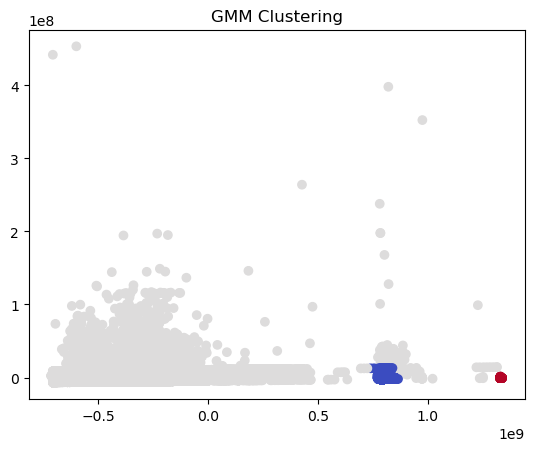

In [52]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocess the data
def preprocess_data(data):
    # Drop non-numeric columns
    data = data.drop(columns=['Account No', 'TRANSACTION DETAILS'], errors='ignore')

    # Convert date columns to numeric ordinal values
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    data['VALUE DATE'] = pd.to_datetime(data['VALUE DATE'], errors='coerce').map(lambda x: x.toordinal() if pd.notnull(x) else x)
    
    # Clean up numeric columns with commas
    for col in ['WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT']:
        if col in data.columns and data[col].dtype == 'object':
            data[col] = data[col].str.replace(",", "", regex=True).astype(float)

    # Drop rows with missing values
    data = data.dropna()
    
    return data

# Apply preprocessing
processed_data = preprocess_data(data)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(processed_data)

# Evaluate Log-Likelihood
print(f"GMM Log-Likelihood: {gmm.lower_bound_}")

# Visualize Clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(processed_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_gmm, cmap='coolwarm')
plt.title('GMM Clustering')
plt.show()


In [149]:
processed_data['Cluster'] = labels_gmm
cluster_summary = processed_data.groupby('Cluster').mean()
print(cluster_summary)


             DATE  CHQ.NO.  VALUE DATE   WITHDRAWAL AMT   DEPOSIT AMT   \
Cluster                                                                  
0        719163.0      0.0    719163.0      9.311704e+05           0.0   
1        719163.0      0.0    719163.0      6.099440e+06           0.0   
2        719163.0      0.0    719163.0      1.782653e+05           0.0   

          BALANCE AMT  
Cluster                
0       -5.363247e+08  
1       -1.699276e+09  
2        1.200010e+06  


In [153]:
# Define the number of clusters during the GMM initialization
n_components = 3  # Example: Adjust to the appropriate number of clusters
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels_gmm = gmm.fit_predict(processed_data)

# Add cluster labels to the processed data
processed_data['Cluster'] = labels_gmm

# Iterate over each cluster and summarize its statistics
for cluster_id in range(n_components):
    cluster_data = processed_data[processed_data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())  # Summarize key statistics for this cluster


Cluster 0:
           DATE  CHQ.NO.  VALUE DATE   WITHDRAWAL AMT    BALANCE AMT  Cluster
count   14724.0  14724.0     14724.0      1.472400e+04  1.472400e+04  14724.0
mean   719163.0      0.0    719163.0      9.311704e+05 -5.363247e+08      0.0
std         0.0      0.0         0.0      2.848388e+06  1.399347e+07      0.0
min    719163.0      0.0    719163.0      1.000000e-02 -5.899684e+08      0.0
25%    719163.0      0.0    719163.0      9.000000e+02 -5.456851e+08      0.0
50%    719163.0      0.0    719163.0      3.000000e+03 -5.430113e+08      0.0
75%    719163.0      0.0    719163.0      1.000000e+04 -5.285950e+08      0.0
max    719163.0      0.0    719163.0      1.923460e+07 -4.654837e+08      0.0
Cluster 1:
           DATE  CHQ.NO.  VALUE DATE   WITHDRAWAL AMT    BALANCE AMT  Cluster
count   36557.0  36557.0     36557.0      3.655700e+04  3.655700e+04  36557.0
mean   719163.0      0.0    719163.0      6.099440e+06 -1.699276e+09      1.0
std         0.0      0.0         0.0      

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means Silhouette Score: 0.5955207405315346
DBSCAN Silhouette Score: 0.4557049646248647
GMM Silhouette Score: 0.7613478432173022


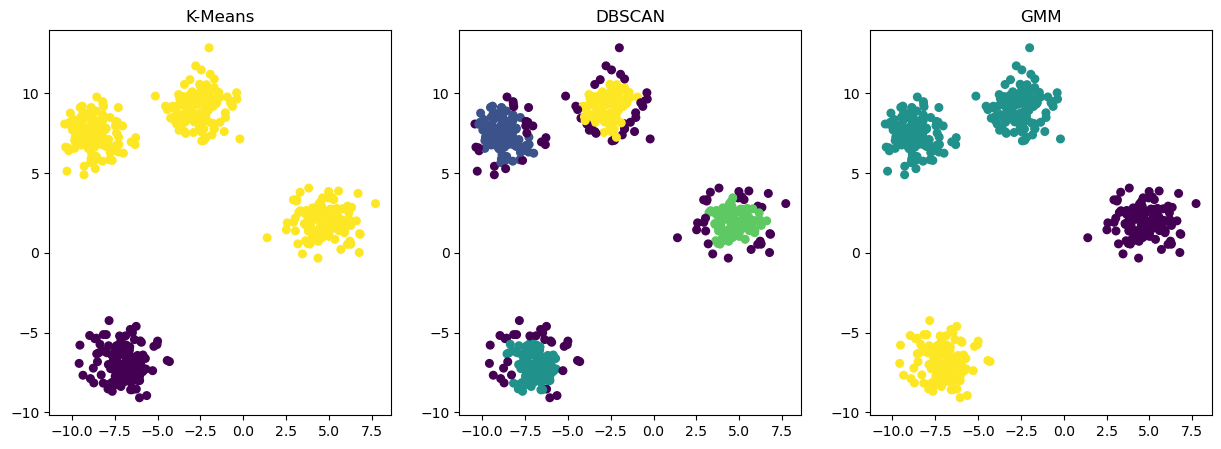

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=2,n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan_labels = dbscan.fit_predict(X)
dbscan_score = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_score = silhouette_score(X, gmm_labels)

# Print results
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")
print(f"GMM Silhouette Score: {gmm_score}")

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
methods = [("K-Means", kmeans_labels), ("DBSCAN", dbscan_labels), ("GMM", gmm_labels)]
for i, (title, labels) in enumerate(methods):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[i].set_title(title)
plt.show()
